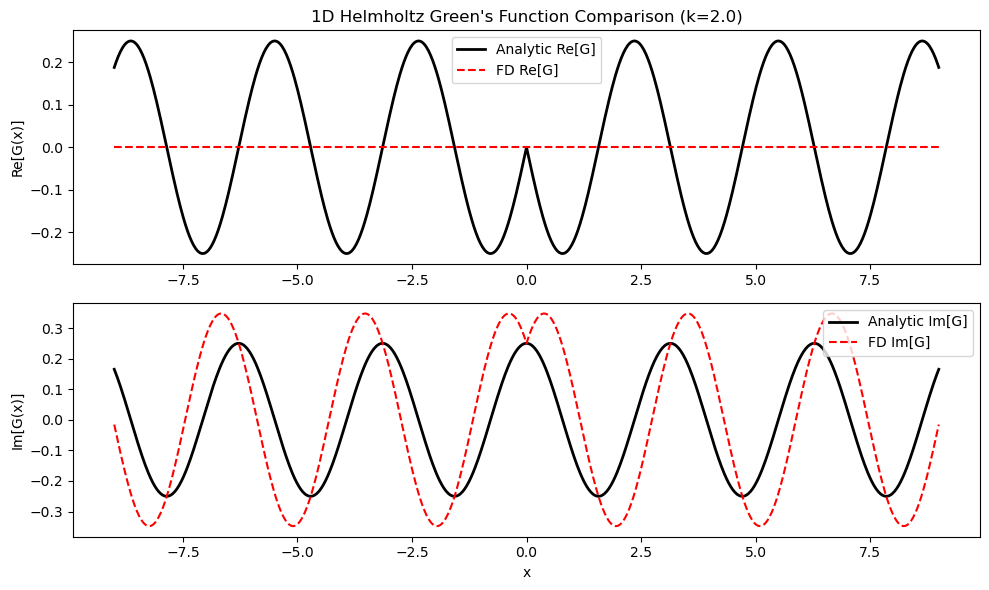

In [5]:
# compare_helmholtz_green_fd.py
# -*- coding: utf-8 -*-
"""
Compare the analytic and finite-difference solutions of the 1D Helmholtz Green's function.
Equation: d^2G/dx^2 + k^2 G = δ(x)
Analytic: G(x) = (i / (2k)) * exp(i k |x|)
"""

import numpy as np
import matplotlib
# Uncomment if running headless:
# matplotlib.use("Agg")
import matplotlib.pyplot as plt

# --- Analytic Green's function ---
def G_analytic(x, k):
    return 1j / (2 * k) * np.exp(1j * k * np.abs(x))

# --- Finite Difference solver ---
def helmholtz_fd(x, k):
    """
    Solve (d^2/dx^2 + k^2)G = δ(x) using central differences.
    Dirichlet (G=0) boundaries at ends (approx. outgoing).
    """
    n = len(x)
    dx = x[1] - x[0]
    G_fd = np.zeros(n, dtype=complex)

    # Build tridiagonal system: (d^2/dx^2 + k^2) G = δ
    main_diag = -2.0 / dx**2 + k**2
    off_diag = 1.0 / dx**2

    # Create sparse-like matrix
    A = np.zeros((n, n), dtype=complex)
    np.fill_diagonal(A, main_diag)
    np.fill_diagonal(A[1:], off_diag)
    np.fill_diagonal(A[:, 1:], off_diag)

    # Source (delta at x=0)
    src = np.zeros(n, dtype=complex)
    idx0 = np.argmin(np.abs(x))  # closest to zero
    src[idx0] = 1.0 / dx  # normalized discrete delta

    # Solve the linear system
    G_fd = np.linalg.solve(A, src)

    return G_fd

# --- Parameters ---
k = 2.0
x_max = 9.0
n_points = 801
x = np.linspace(-x_max, x_max, n_points)

# --- Compute both solutions ---
G_an = G_analytic(x, k)
G_fd = helmholtz_fd(x, k)

# Normalize FD to match amplitude scale (since FD boundary affects normalization)
scale = G_an[np.argmin(np.abs(x))] / G_fd[np.argmin(np.abs(x))]
G_fd *= scale

# --- Plot comparison ---
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x, np.real(G_an), 'k-', lw=2, label='Analytic Re[G]')
plt.plot(x, np.real(G_fd), 'r--', lw=1.5, label='FD Re[G]')
plt.ylabel('Re[G(x)]')
plt.legend()
plt.title(f"1D Helmholtz Green's Function Comparison (k={k})")

plt.subplot(2, 1, 2)
plt.plot(x, np.imag(G_an), 'k-', lw=2, label='Analytic Im[G]')
plt.plot(x, np.imag(G_fd), 'r--', lw=1.5, label='FD Im[G]')
plt.xlabel('x')
plt.ylabel('Im[G(x)]')
plt.legend()

plt.tight_layout()
plt.savefig("helmholtz_green_fd_comparison.png", dpi=300)
plt.show()
